In [1]:
#utilities
def readgenfile(filename):
    count = 0 
    with open(filename,'r') as f:
        header = ''
        gotheader = False
        genomes = []
        for line in f:
            #print(line[0])
            if gotheader:
                genomes.append({'header':header.rstrip(), 'sequence':line.rstrip()})
                gotheader = False
            elif line[0]=='>':
                header = line[1:]
                gotheader = True        
            count += 1
    print ("lines read: ", count)
    print ("sequences read: ", len(genomes))
    return genomes

def savegenfile(filename, genomes):
    count = 0
    with open(filename,'w') as f:
        for genome in genomes:
            f.write('>'+genome["header"])
            f.write('\n')
            f.write(genome["sequence"])
            f.write('\n')
            count += 1
    print('sequences saved:', count)

def filtergenomes(genomes, filter):
    return [genome for genome in genomes if filter in genome["header"] ]

In [3]:
#1. filter out foreign sequences
genfilename = "/home/dglyzin/data/sars-cov-2/2020_04_27/sarscov2_20200427.fin.fas"
allgenomes = readgenfile(genfilename)

rusgenomes = filtergenomes(allgenomes, 'Russ')
rusgenfilename = "rus_sarscov2.fin.fas"
savegenfile(rusgenfilename, rusgenomes)
        
#for genome in rusgenomes:
#    print(genome['header'])
#for genome in rusgenomes:
#    print(len(genome['sequence']))
#dates = [ genome["header"].split('|')[2] for genome in rusgenomes]
#print(dates)

lines read:  11938
sequences read:  5969
sequences saved: 150


lines read:  300
sequences read:  150


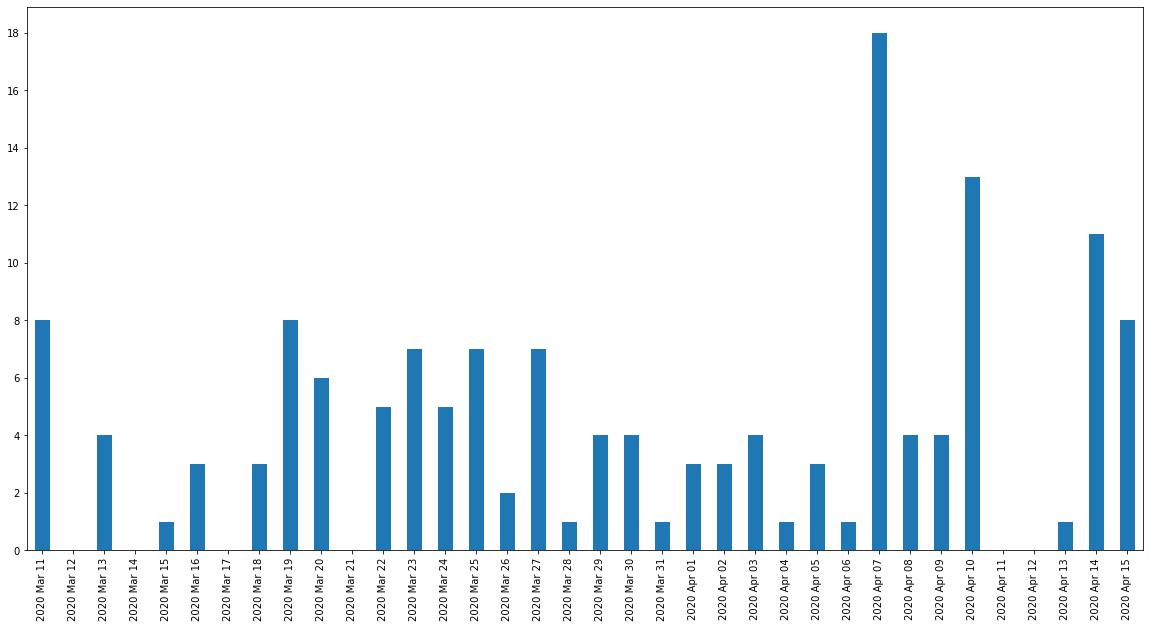

In [6]:
import pandas as pd  
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

rusgenomes = readgenfile("rus_sarscov2.fin.fas")
splitheader = [ {'location':genome["header"].split('|')[0], \
                 'code':genome["header"].split('|')[1], \
                 'date': genome["header"].split('|')[2]} \
               for genome in rusgenomes]

# Creates DataFrame.  
df = pd.DataFrame(splitheader)  
df["date"] = df["date"].astype("datetime64")  
existdatecounts = df["date"].value_counts()
datelist = pd.date_range(df['date'].min(), df['date'].max())

alldatecounts = [0]*datelist.size
for idx, date in enumerate(datelist):
    if date in existdatecounts:
        alldatecounts[idx] = existdatecounts[date]
        
ts = pd.Series(alldatecounts,  index=datelist)

ax = ts.plot(kind='bar', figsize=(20,10), yticks=range(0,max(alldatecounts)+1,2))
ticklabels = ['']*len(ts.index)
ticklabels[::1] = [item.strftime('%Y %b %d') for item in ts.index[::1]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))


#plt.gcf().autofmt_xdate()
plt.show()

